In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#----------------------------------------------------
#reading data
data = pd.read_csv('Sample-Superstore.csv',encoding="latin1",parse_dates=["Order Date","Ship Date"] )

data.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
def count_unique_values(data):
    
    total = data.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))
count_unique_values(data)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Total,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
Uniques,9994,5009,1237,1334,4,793,793,3,1,531,...,631,4,1862,3,17,1850,5825,14,12,7287


In [10]:
# remove all col that have 1 value
def remove_constant_value_features(data):
    return [e for e in data.columns if data[e].nunique() == 1]
drop_col = remove_constant_value_features(data)
print(drop_col)

['Country']


In [11]:
# remove all distinct value
def remove_distinct_value_features(data):
    return [e for e in data.columns if data[e].nunique() == data.shape[0]]
drop_col = remove_distinct_value_features(data)
print(drop_col)

['Row ID']


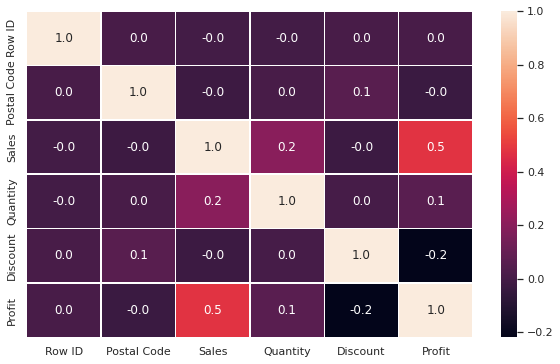

In [12]:
def HMap(dff) : 
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    sns.heatmap(dff.corr(), annot=True, linewidths=.5, fmt= '.1f')

HMap(data)

Profit         1.000000
Sales          0.479064
Quantity       0.066253
Row ID         0.012497
Postal Code   -0.029961
Discount      -0.219487
Name: Profit, dtype: float64


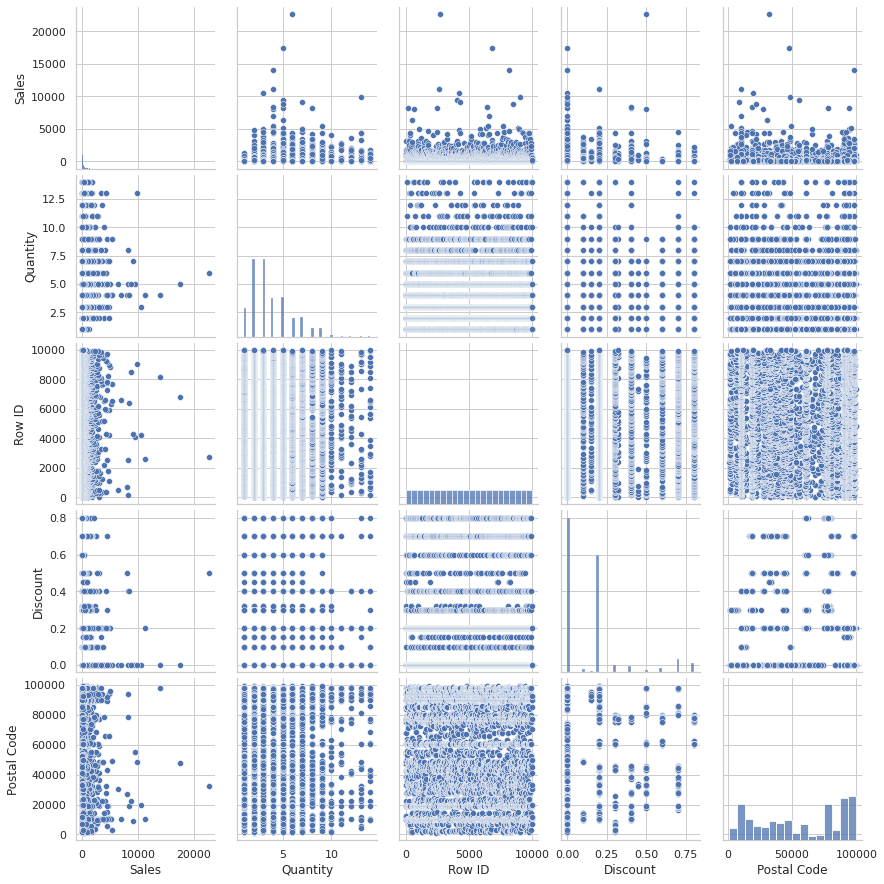

In [13]:
# Find most important features relative to target
corr = data.corr()
corr.sort_values(["Profit"], ascending = False, inplace = True)
print(corr.Profit)

#most coorelated columns
col = ['Sales', 'Quantity', 'Row ID', 'Discount', 'Postal Code'] ### put most corr columns here
sns.pairplot(data[col]);

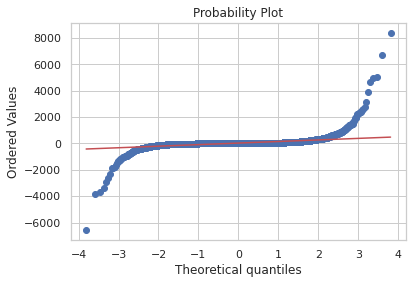

In [14]:
#let see y if normal distriputed or not
from scipy import stats
stats.probplot(data["Profit"], plot = plt);

In [15]:
# data["Profit"] = np.log(data["Profit"])
# stats.probplot(data["Profit"], plot = plt);

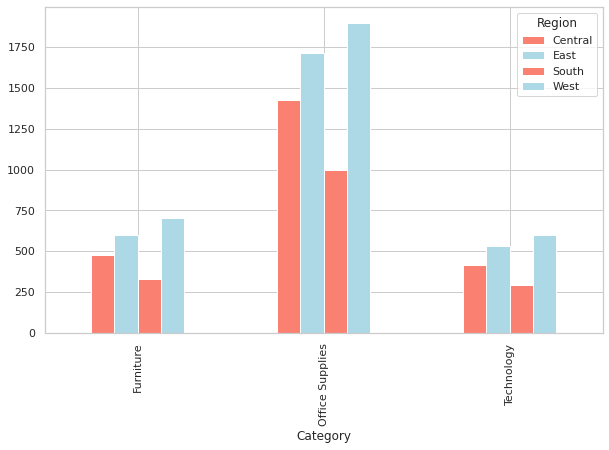

In [16]:
# Create a plot
pd.crosstab(data.Category, data.Region).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

In [17]:
data.rename(columns = {'Ship Mode' : 'Ship_Mode' } , inplace = True)

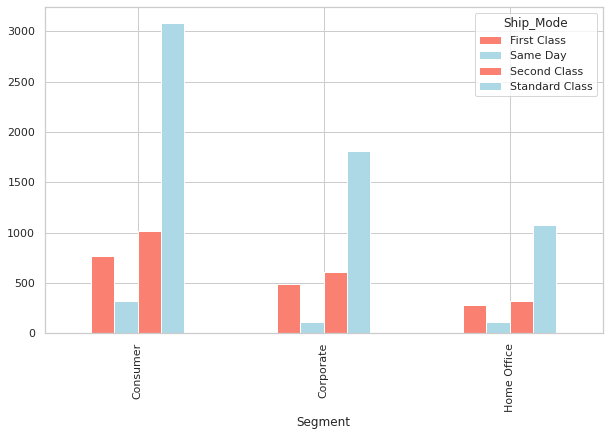

In [18]:
pd.crosstab(data.Segment, data.Ship_Mode).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

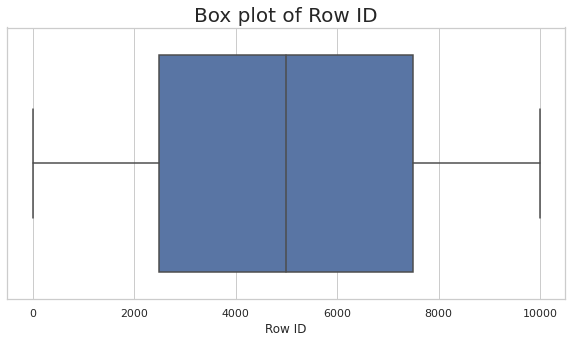

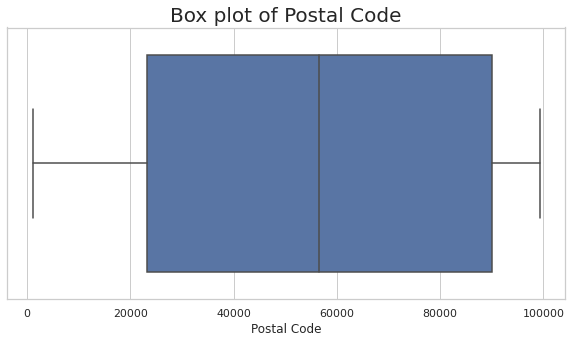

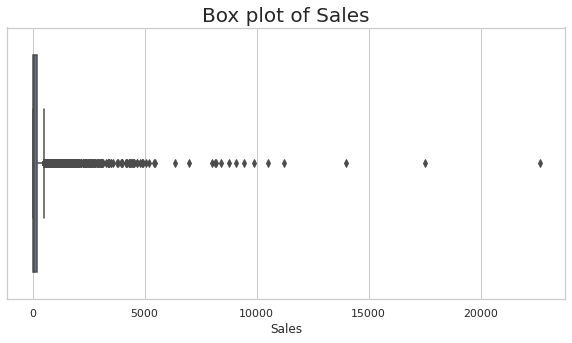

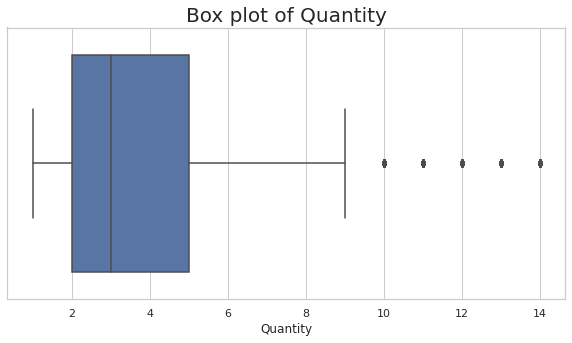

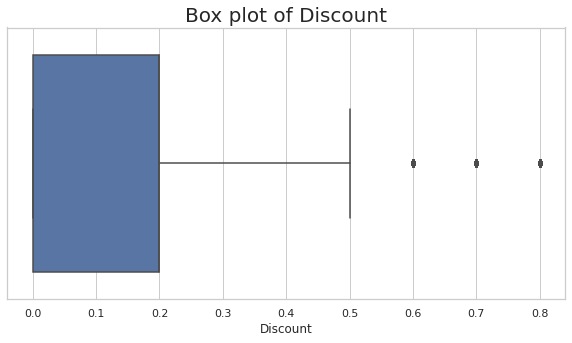

In [19]:
#poxplot all numerical_features

numerical_features = data.select_dtypes(exclude = ["object"]).columns


### but numerical_features in usecols
df1 = pd.read_csv('Sample-Superstore.csv',encoding="latin1", usecols=['Row ID','Postal Code', 'Sales', 'Quantity',
       'Discount', 'Profit'])

for column in df1.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df1[column])
    plt.title('Box plot of {}'.format(column), fontsize=20)

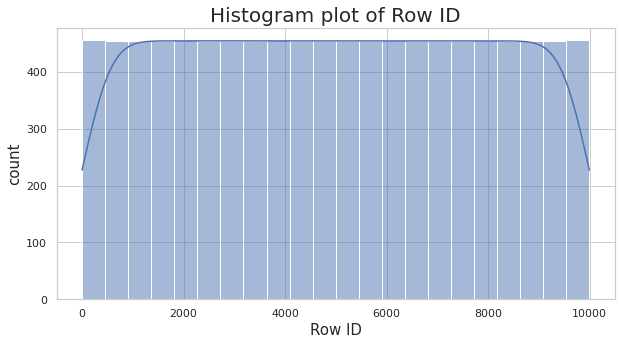

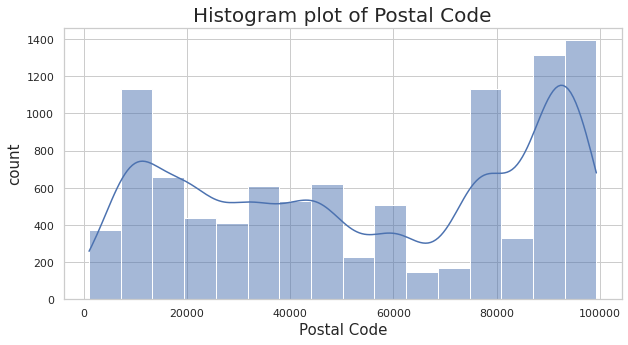

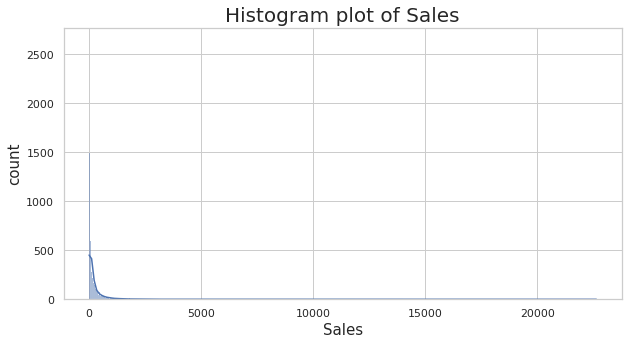

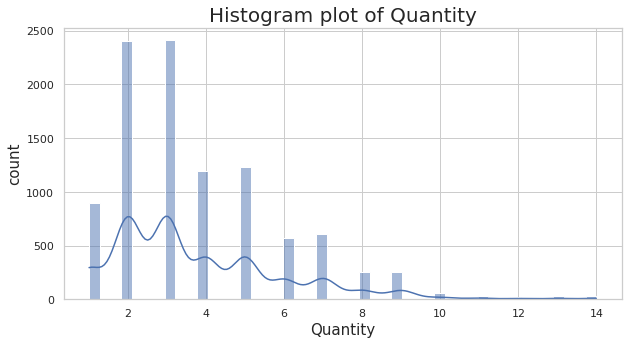

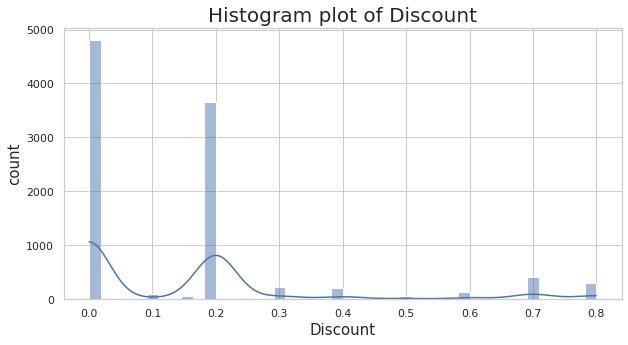

In [20]:
for column in df1.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df1[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=20)

Discrete Variables Count: 2


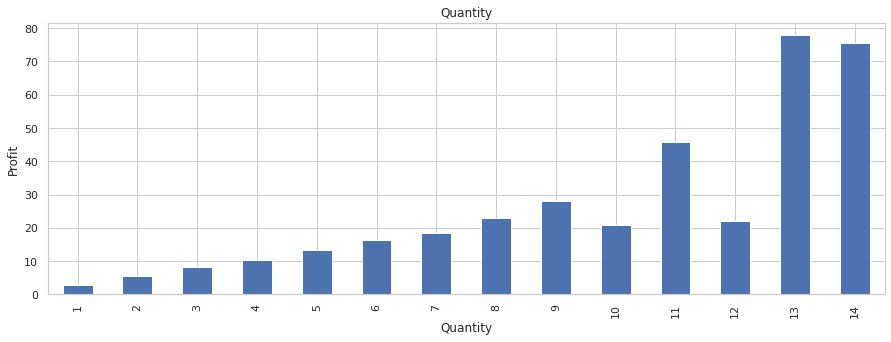

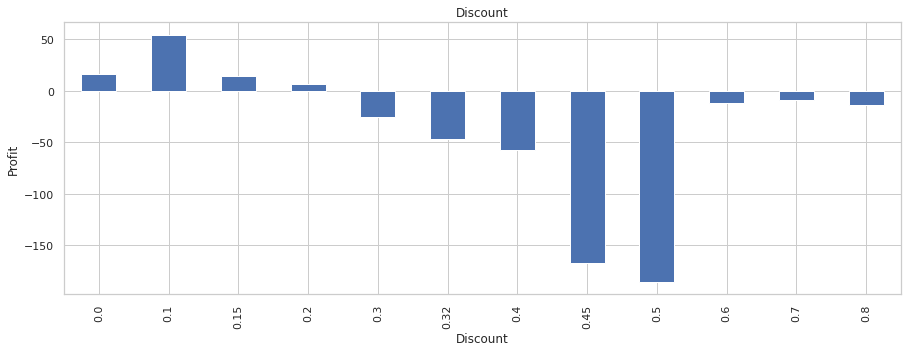

In [21]:
umerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

## Lets Find the realtionship between them and Y

for feature in discrete_feature:
    data=data.copy()
    plt.figure(figsize=(15, 5))
    data.groupby(feature)['Profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plt.show()

In [22]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:
# This will turn all of the string value into category values
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

#Finding Categorical Featurs
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'category' ]
print(categorical_features )

#convert all cols to numbers
cols= categorical_features  
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

['Order ID', 'Ship_Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


In [24]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,2500,2016-11-08,2016-11-11,2,143,166,0,0,194,...,42420,2,12,0,4,386,261.9600,2,0.00,41.9136
1,2,2500,2016-11-08,2016-11-11,2,143,166,0,0,194,...,42420,2,55,0,5,839,731.9400,3,0.00,219.5820
2,3,2296,2016-06-12,2016-06-16,2,237,201,1,0,266,...,90036,3,946,1,10,1433,14.6200,2,0.00,6.8714
3,4,4372,2015-10-11,2015-10-18,3,705,687,0,0,153,...,33311,2,319,0,16,366,957.5775,5,0.45,-383.0310
4,5,4372,2015-10-11,2015-10-18,3,705,687,0,0,153,...,33311,2,1316,1,14,573,22.3680,2,0.20,2.5164


In [25]:
#Zscore_outlier Method
out=[]
def Zscore_outlier(data):
    for i in data: 
       z = (i-np.mean(data))/np.std(data)
       if np.abs(z) > 3: 
         out.append(i)                   
    print("Profit:",out)
Zscore_outlier(data['Profit'])

Profit: [-1665.0522, -1359.992, -950.4, 1995.99, 1415.4296, -814.4832, 3177.475, 1379.977, -3839.9904, -760.98, 829.3754, 1276.4871, 762.1845, 2400.9657, -1850.9464, -786.744, 1459.2, 1480.4671, -1049.3406, 843.1706, -766.012, 1159.9855, 1228.1787, 3919.9888, -935.9595, -1811.0784, -1143.891, 1264.7559, -1306.5504, -3399.98, 874.9875, 792.2691, -2639.9912, 1049.985, 767.2005, -1480.0335, 757.4112, 742.632, 944.9865, 1416.8, 4630.4755, -944.9946, 5039.9856, 2365.9818, -1065.372, 1007.9832, 751.9624, -1181.2824, 843.1706, -2929.4845, 1114.512, 1371.9804, -786.0144, -2287.782, -1002.7836, 743.988, 1439.976, 1014.9797, 884.058, -1031.5385, 942.8157, -729.9138, 1351.9896, 1119.9968, 2504.2216, 899.982, 2239.9872, -734.5264, 1061.5722, 8399.976, 770.352, 839.986, 1270.99, 746.4078, 735.0336, 909.9818, -938.28, 2591.9568, 742.632, 1906.485, -6599.978, 1644.2913, -1237.8462, 1668.205, 6719.9808, 2229.024, -913.176, 764.3818, 2799.984, -913.176, -1141.47, 1143.891, 1906.485, 751.7601, 2302.9671

In [26]:
#Zscore_outlier Method
out=[]
def Zscore_outlier(data):
    for i in data: 
       z = (i-np.mean(data))/np.std(data)
       if np.abs(z) > 3: 
         out.append(i)                   
    print("Sales:",out)
Zscore_outlier(data['Sales'])

Sales: [3083.43, 8159.952, 3347.37, 3059.982, 2519.958, 3991.98, 4355.168, 2396.2656, 2735.952, 6354.95, 2999.95, 7999.98, 3059.982, 2715.93, 2309.65, 4899.93, 2244.48, 3610.848, 2453.43, 3040.0, 3149.93, 2807.84, 4663.736, 2575.944, 3999.95, 2396.4, 4548.81, 8187.65, 2665.62, 11199.968, 2399.6, 22638.48, 2690.97, 2549.985, 2799.96, 2934.33, 3359.952, 4164.05, 2504.74, 2395.2, 2430.08, 2799.96, 2591.56, 3080.0, 9449.95, 2624.985, 10499.97, 4799.984, 9099.93, 4367.896, 2879.952, 2404.704, 2249.91, 2321.9, 2799.96, 3504.9, 3930.072, 2275.5, 2314.116, 2479.96, 2999.95, 2348.82, 2799.944, 4912.59, 4228.704, 2357.488, 2548.56, 4158.912, 2888.127, 2254.41, 2279.96, 2793.528, 5199.96, 8399.976, 5443.96, 2152.776, 4007.84, 4164.05, 6999.96, 3266.376, 17499.95, 2887.056, 2567.84, 2399.96, 2399.96, 4416.174, 2541.98, 2573.82, 2249.91, 2625.12, 3499.93, 5399.91, 3812.97, 4499.985, 4535.976, 3404.5, 2518.29, 3357.6, 2973.32, 13999.96, 4643.8, 2803.92, 2563.056, 2939.93, 2154.9, 2678.94, 8749.95, 2

In [27]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Row ID,0,0.0
Postal Code,0,0.0
Discount,0,0.0
Quantity,0,0.0
Sales,0,0.0
Product Name,0,0.0
Sub-Category,0,0.0
Category,0,0.0
Product ID,0,0.0
Region,0,0.0


In [28]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,2500,2016-11-08,2016-11-11,2,143,166,0,0,194,...,42420,2,12,0,4,386,261.9600,2,0.00,41.9136
1,2,2500,2016-11-08,2016-11-11,2,143,166,0,0,194,...,42420,2,55,0,5,839,731.9400,3,0.00,219.5820
2,3,2296,2016-06-12,2016-06-16,2,237,201,1,0,266,...,90036,3,946,1,10,1433,14.6200,2,0.00,6.8714
3,4,4372,2015-10-11,2015-10-18,3,705,687,0,0,153,...,33311,2,319,0,16,366,957.5775,5,0.45,-383.0310
4,5,4372,2015-10-11,2015-10-18,3,705,687,0,0,153,...,33311,2,1316,1,14,573,22.3680,2,0.20,2.5164


In [29]:
data.rename(columns = {'Order Date' : 'Order_Date' } , inplace = True)
data.rename(columns = {'Ship Date' : 'Ship_Date' } , inplace = True)

In [30]:
data["Order_Date	"] = data.Order_Date.dt.year
data["Order_Date	"] = data.Order_Date.dt.month
data["Order_Date	"] = data.Order_Date.dt.day
data.drop("Order_Date",axis=1,inplace = True) 

In [31]:
data["Ship_Date	"] = data.Ship_Date.dt.year
data["Ship_Date	"] = data.Ship_Date.dt.month
data["Ship_Date	"] = data.Ship_Date.dt.day
data.drop("Ship_Date",axis=1,inplace = True) 

In [32]:
#X Data
X = data.drop(['Profit'], axis=1, inplace=False)
print('X Data is \n' , X.head())
#print('X shape is ' , X.shape)

#y Data
y = data['Profit']
#print('y Data is \n' , y.head())
#print('y shape is ' , y.shape)



X Data is 
    Row ID  Order ID  Ship_Mode  Customer ID  Customer Name  Segment  Country  \
0       1      2500          2          143            166        0        0   
1       2      2500          2          143            166        0        0   
2       3      2296          2          237            201        1        0   
3       4      4372          3          705            687        0        0   
4       5      4372          3          705            687        0        0   

   City  State  Postal Code  Region  Product ID  Category  Sub-Category  \
0   194     15        42420       2          12         0             4   
1   194     15        42420       2          55         0             5   
2   266      3        90036       3         946         1            10   
3   153      8        33311       2         319         0            16   
4   153      8        33311       2        1316         1            14   

   Product Name     Sales  Quantity  Discount  Order_Dat

In [33]:
#Import Libraries
from sklearn.impute import SimpleImputer
import numpy as np
#----------------------------------------------------

#----------------------------------------------------
# Cleaning data

'''
impute.SimpleImputer(missing_values=nan, strategy='mean’, fill_value=None, verbose=0, copy=True)
'''


ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)


#X Data
#print('X Data is \n' , X[:10])

#y Data
#print('y Data is \n' , y[:10])

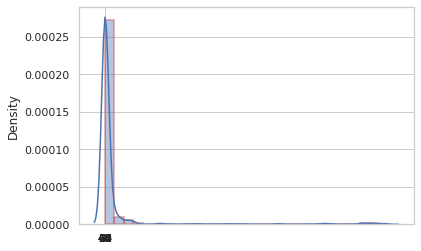

In [34]:
### let see X if normal distriputed or not
sns.distplot(X, kde=True, bins=30,
             norm_hist=True,
             hist_kws=dict(edgecolor="r", linewidth=2))
plt.xticks(range(28, 70, 4))
plt.ylabel('Density')
plt.show()

In [35]:
#----------------------------------------------------
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
#print('X \n' , X[:10])
#print('y \n' , y[:10])

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

In [36]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import SGDRegressor
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# # Put models in a dictionary
# models = {"LinearRegression": LinearRegression(),
#           "SGDRegressor " : SGDRegressor(), 
#           "Lasso "        : Lasso(),
#           "Ridge "        :  Ridge(),
#           "Random Forest ": RandomForestRegressor(),
#           "Gradient Boosting ": GradientBoostingRegressor(),
#           "SVR "          : SVR(),
#           "DecisionTree"  :DecisionTreeRegressor(),
#           "KNN"           :KNeighborsRegressor()}

# # Create function to fit and score models
# def fit_and_score(models, X_train, X_test, y_train, y_test):
#     """
#     Fits and evaluates given machine learning models.
#     models : a dict of different Scikit-Learn machine learning models
#     X_train : training data
#     X_test : testing data
#     y_train : labels assosciated with training data
#     y_test : labels assosciated with test data
#     """
#     # Random seed for reproducible results
#     np.random.seed(44)
#     # Make a list to keep model scores
#     model_scores = {}
#     # Loop through models
#     for name, model in models.items():
#         # Fit the model to the data
#         model.fit(X_train, y_train)
#         # Evaluate the model and append its score to model_scores
#         model_scores[name] = model.score(X_test, y_test)
#     return model_scores

# model_scores = fit_and_score(models=models,
#                              X_train=X_train,
#                              X_test=X_test,
#                              y_train=y_train,
#                              y_test=y_test)
# print(np.array(model_scores))

# #Model Comparison
# model_compare = pd.DataFrame(model_scores, index=['accuracy'])
# model_compare.T.plot.bar();

In [37]:
#Import Libraries
from sklearn.ensemble import GradientBoostingRegressor
#----------------------------------------------------

#----------------------------------------------------
#Applying Gradient Boosting Regressor Model 

'''
sklearn.ensemble.GradientBoostingRegressor(loss='ls’, learning_rate=0.1,n_estimators=100, subsample=
                                           1.0, criterion='friedman_mse’,min_samples_split=2,min_samples_leaf=1,
                                           min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,
                                           min_impurity_split=None,init=None, random_state=None,max_features=None, alpha=0.9,
                                           verbose=0, max_leaf_nodes=None,warm_start=False, presort='auto'
                                           , validation_fraction=0.1,n_iter_no_change=None, tol=0.0001)
'''

GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33)
GBRModel.fit(X_train, y_train)

#Calculating Details
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = GBRModel.predict(X_test)
#print('Predicted Value for GBRModel is : ' , y_pred[:10])

GBRModel Train Score is :  0.9648133609906803
GBRModel Test Score is :  0.5986009154271097


In [38]:
# #RandomizedSearchCV
# search_grid={
#     "n_estimators":[5,50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# }
# from sklearn.model_selection import RandomizedSearchCV
# tuning_model = RandomizedSearchCV(estimator=GBRModel ,param_distributions=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=10)
# tuning_model.fit(X_train, y_train)


In [39]:
# best hyperparameters 
# print(tuning_model.best_params_)
# print(tuning_model.best_score_)

{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}


-11676.06727455567


In [40]:

GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=3,learning_rate = 0.01 ,random_state=33)
GBRModel.fit(X_train, y_train)

#Calculating Details
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))


GBRModel Train Score is :  0.9232375708658648
GBRModel Test Score is :  0.7363654224044947


In [41]:
import pickle
# Save an extisting model to file
pickle.dump(GBRModel, open("Predction Sample-Superstore.pkl", "wb"))
# Load a saved model
loaded_pickle_model = pickle.load(open("Predction Sample-Superstore.pkl", "rb"))
print(loaded_pickle_model.score(X_test,y_test))

0.7363654224044947
